**Importing Libaries**

In [50]:
import numpy as np 
import pandas as pd

**Importing Dataset**

In [51]:
df1 = pd.read_json("Sarcasm_Headlines_Dataset_v2.json",lines = True)
df2 = pd.read_json("Sarcasm_Headlines_Dataset.json", lines = True)

df = pd.concat([df1,df2],sort = False)
df.tail()



,is_sarcastic,headline,article_link
26704,0,american politics in moral free-fall,https://www.huffingtonpost.com/entry/american-...
26705,0,america's best 20 hikes,https://www.huffingtonpost.com/entry/americas-...
26706,0,reparations and obama,https://www.huffingtonpost.com/entry/reparatio...
26707,0,israeli ban targeting boycott supporters raise...,https://www.huffingtonpost.com/entry/israeli-b...
26708,0,gourmet gifts for the foodie 2014,https://www.huffingtonpost.com/entry/gourmet-g...


Text(0.5, 1.0, 'Data Distribution')

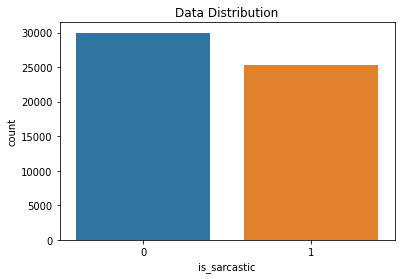

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "is_sarcastic", data = df)
plt.title("Data Distribution")

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Machine Learning**

**Data Preprocessing using NLTK**

In [54]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 

def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)

In [55]:
x_data = df["headline"].apply(preprocess)
x_data.tail()

26704                       american polit moral free fall
26705                                 america best 20 hike
26706                                          repar obama
26707    isra ban target boycott support rais alarm abroad
26708                              gourmet gift foodi 2014
Name: headline, dtype: object

**Splitting the dataset into training & test set**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, df['is_sarcastic'].values, test_size=0.10, random_state=42)

**Vectorization of features using TF-IDF Vectorizer**

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 

df_idf.sort_values(by=['idf_weights']).tail()



,idf_weights
frailti,11.122543
fraction,11.122543
foxtrot,11.122543
stewman,11.122543
00,11.122543


**Naive Bayes Classifier**

In [58]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()

nb.fit(x_train_tfidf, y_train)
print(f"Training Score : {nb.score(x_train_tfidf, y_train)}")
print(f"Test Score : {nb.score(x_test_tfidf, y_test)}")

Training Score : 0.8885229440706899
Test Score : 0.848364359298753


In [60]:
from  sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test,nb.predict(x_test_tfidf)))
print("Summary")
print(classification_report(y_test,nb.predict(x_test_tfidf)))

Confusion Matrix:
[[2681  303]
 [ 536 2013]]
Summary
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2984
           1       0.87      0.79      0.83      2549

    accuracy                           0.85      5533
   macro avg       0.85      0.84      0.85      5533
weighted avg       0.85      0.85      0.85      5533



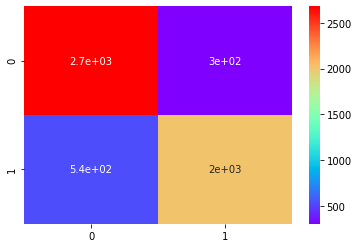

In [16]:
sns.heatmap(confusion_matrix(y_test,nb.predict(x_test_tfidf)),annot=True,cmap='rainbow')

**Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)
print(f"Training Score : {rf.score(x_train_tfidf, y_train)}")
print(f"Test Score : {rf.score(x_test_tfidf, y_test)}")

Training Score : 1.0
Test Score : 0.969636725103922


In [61]:
print("Confusion Matrix")
print(confusion_matrix(y_test,rf.predict(x_test_tfidf)))
print("Summary")
print(classification_report(y_test,rf.predict(x_test_tfidf)))

Confusion Matrix
[[2940   44]
 [ 124 2425]]
Summary
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2984
           1       0.98      0.95      0.97      2549

    accuracy                           0.97      5533
   macro avg       0.97      0.97      0.97      5533
weighted avg       0.97      0.97      0.97      5533



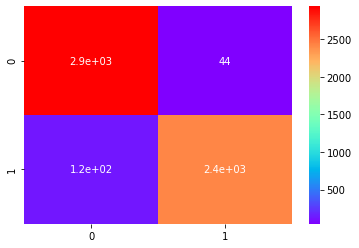

In [21]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test_tfidf)),annot=True,cmap='rainbow')

**Deep Learning**

**Importing libaries**

In [89]:
from keras.models import Model

from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten, LSTM, Input, Embedding
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from keras.layers import BatchNormalization , Activation

**Visualization**

In [90]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()



**Preprocessing the training and test headlines for the word embedding**

In [92]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df[['headline', 'is_sarcastic']], test_size=0.1)  

training_sentences = list(train_data['headline'])
training_labels = list(train_data['is_sarcastic'])

testing_sentences = list(test_data['headline'])
testing_labels = list(test_data['is_sarcastic'])
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

**Tokenization and Padding**

In [ ]:
vocab_size = 10000 
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



**Long-Short Term Memory(LSTM)**

In [91]:
vocab_size = 10000 
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"
#Building LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               6500      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 179,545
Trainable params: 179,345
Non-trainable params: 200
______________________________________________

In [96]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
779/779 [==============================] - 69s 89ms/step - loss: 0.0301 - accuracy: 0.9971 - val_loss: 0.1493 - val_accuracy: 0.9720
Epoch 2/10
779/779 [==============================] - 70s 89ms/step - loss: 0.0376 - accuracy: 0.9949 - val_loss: 0.1599 - val_accuracy: 0.9731
Epoch 3/10
779/779 [==============================] - 70s 89ms/step - loss: 0.0273 - accuracy: 0.9975 - val_loss: 0.1500 - val_accuracy: 0.9763
Epoch 4/10
779/779 [==============================] - 69s 89ms/step - loss: 0.0248 - accuracy: 0.9989 - val_loss: 0.1495 - val_accuracy: 0.9774
Epoch 5/10
779/779 [==============================] - 69s 88ms/step - loss: 0.0278 - accuracy: 0.9975 - val_loss: 0.1444 - val_accuracy: 0.9772
Epoch 6/10
779/779 [==============================] - 69s 89ms/step - loss: 0.0230 - accuracy: 0.9983 - val_loss: 0.1459 - val_accuracy: 0.9772
Epoch 7/10
779/779 [==============================] - 70s 90ms/step - loss: 0.0217 - accuracy: 0.9986 - val_loss: 0.1586 - val_accuracy:

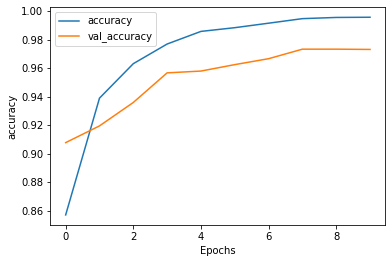

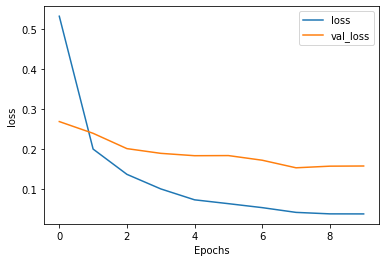

In [46]:
#Evaluating Accuracy and Loss of the LSTM model
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

**Convolutional Neural Network(CNN)**

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12900     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [48]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
779/779 [==============================] - 14s 18ms/step - loss: 0.6492 - accuracy: 0.8357 - val_loss: 0.3672 - val_accuracy: 0.8590
Epoch 2/10
779/779 [==============================] - 14s 18ms/step - loss: 0.2651 - accuracy: 0.9177 - val_loss: 0.2847 - val_accuracy: 0.9019
Epoch 3/10
779/779 [==============================] - 14s 18ms/step - loss: 0.2225 - accuracy: 0.9341 - val_loss: 0.5883 - val_accuracy: 0.7860
Epoch 4/10
779/779 [==============================] - 15s 19ms/step - loss: 0.1991 - accuracy: 0.9418 - val_loss: 3.6329 - val_accuracy: 0.4795
Epoch 5/10
779/779 [==============================] - 15s 19ms/step - loss: 0.2018 - accuracy: 0.9398 - val_loss: 5.6952 - val_accuracy: 0.4611
Epoch 6/10
779/779 [==============================] - 15s 19ms/step - loss: 0.1801 - accuracy: 0.9503 - val_loss: 1.5035 - val_accuracy: 0.6033
Epoch 7/10
779/779 [==============================] - 15s 19ms/step - loss: 0.1800 - accuracy: 0.9505 - val_loss: 0.2790 - val_accuracy:

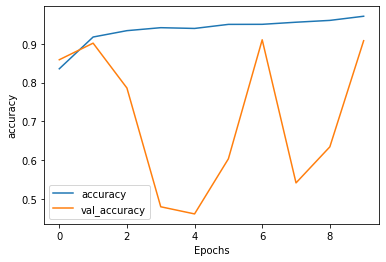

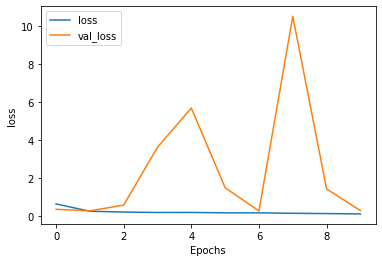

In [49]:
#Evaluating Accuracy and Loss of the CNN model
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()